In [ ]:
#@title Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
# import module
from tabulate import tabulate

In [ ]:
dataset = pd.read_csv('mkc10.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
y

array([0.64052806, 0.5931666 , 0.57556581, ..., 0.96947726, 0.89657763,
       0.92025023])

In [ ]:
X

array([[ 25.002, 200.   , 353.   ],
       [ 25.003, 200.   , 353.   ],
       [ 25.004, 200.   , 353.   ],
       ...,
       [ 32.998, 255.9  , 357.2  ],
       [ 32.999, 255.9  , 357.2  ],
       [ 33.   , 255.9  , 357.2  ]])

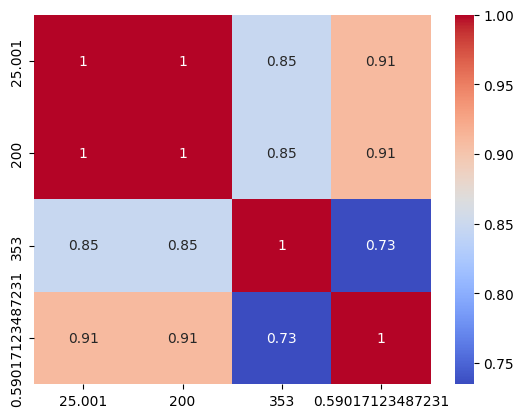

In [ ]:

# Compute correlation matrix
corr = dataset.corr()

# Plot correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


## Splitting Dataset into test and training set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Building ANN**

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=23, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.6127 - accuracy: 0.0000e+00
Epoch 2/100
175/175 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.0000e+00
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.0000e+00
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 8/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 9/100
175/175 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.0000e+00
Epoch 10/100
175/175 [==============================] -

In [ ]:
y_pred = ann.predict(X_test)
y_pred

75/75 [==============================] - 0s 1ms/step


array([[0.65012264],
       [0.6221583 ],
       [0.81635714],
       ...,
       [0.6906395 ],
       [0.75316894],
       [0.63387066]], dtype=float32)

In [ ]:
r2_score(y_test, y_pred)

0.8759774956177022

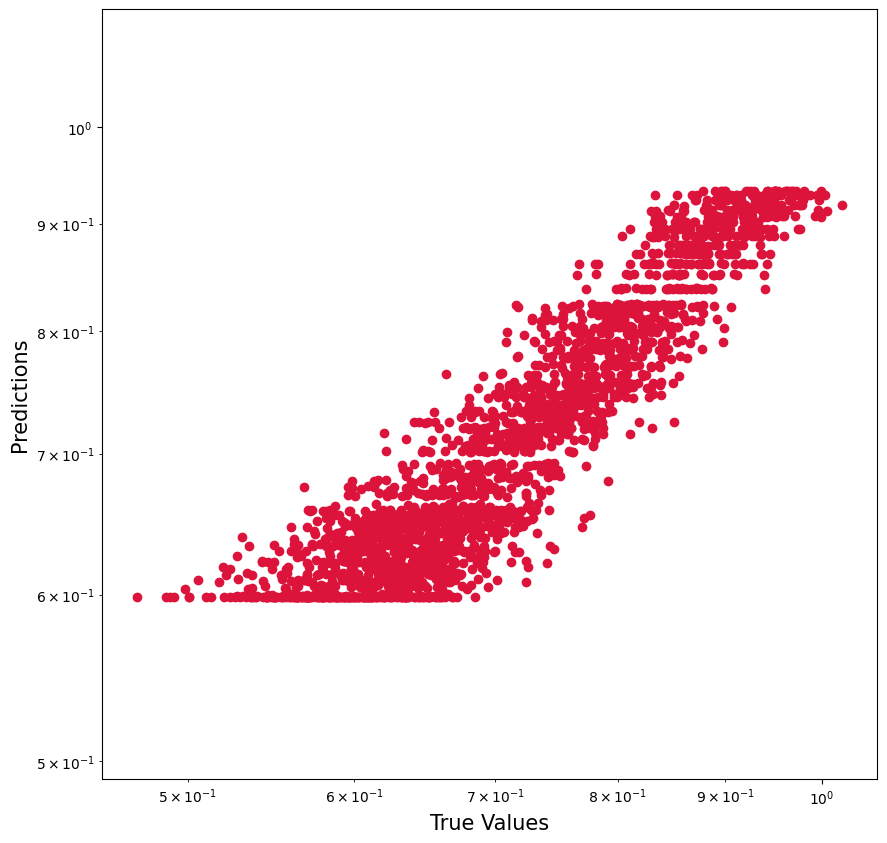

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
y_test.reshape(2400,1)


array([[0.68402341],
       [0.61819283],
       [0.80595026],
       ...,
       [0.74562503],
       [0.7240427 ],
       [0.59411036]])

In [ ]:

# assign data
mydata = [
    [y_pred, y_test.reshape(2400,1)],
]
 
# create header
head = ["y_pred", "y_test"]
 
# display table
predictions=tabulate(mydata, headers=head, tablefmt="grid")
print(predictions)

+----------------+----------------+
| y_pred         | y_test         |
+================+================+
| [[0.65012264]  | [[0.68402341]  |
|  [0.6221583 ]  |  [0.61819283]  |
|  [0.81635714]  |  [0.80595026]  |
|  ...           |  ...           |
|  [0.6906395 ]  |  [0.74562503]  |
|  [0.75316894]  |  [0.7240427 ]  |
|  [0.63387066]] |  [0.59411036]] |
+----------------+----------------+
